Empty DataFrame
Columns: []
Index: []
{'name': 'Shot_Chart_Detail', 'headers': ['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING', 'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM'], 'rowSet': []}


KeyError: "['Blocks'] not in index"

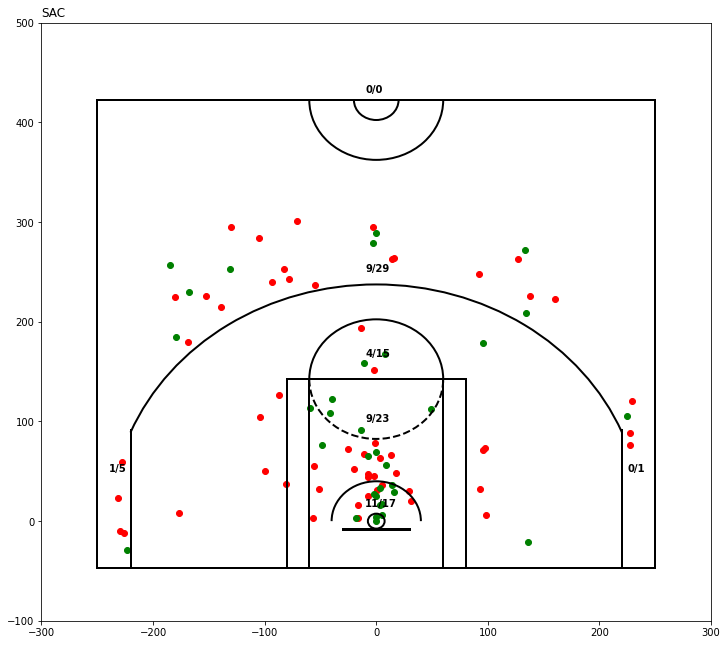

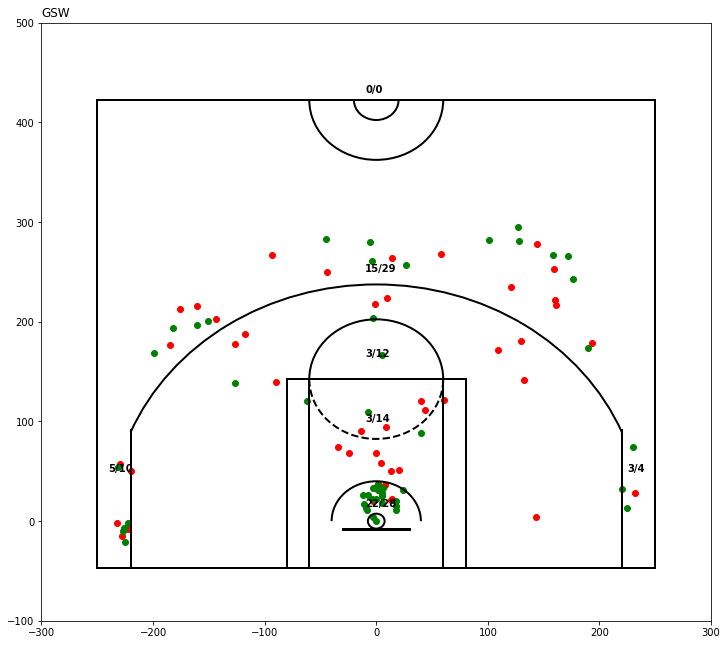

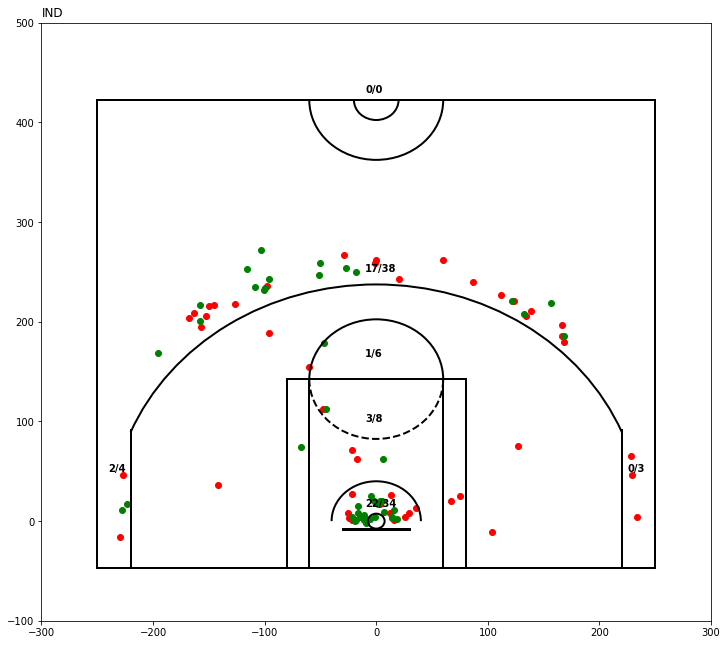

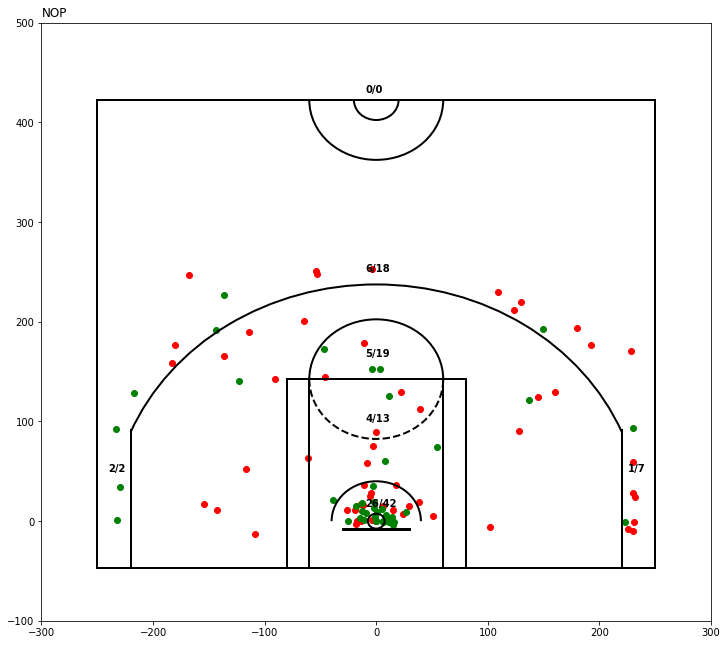

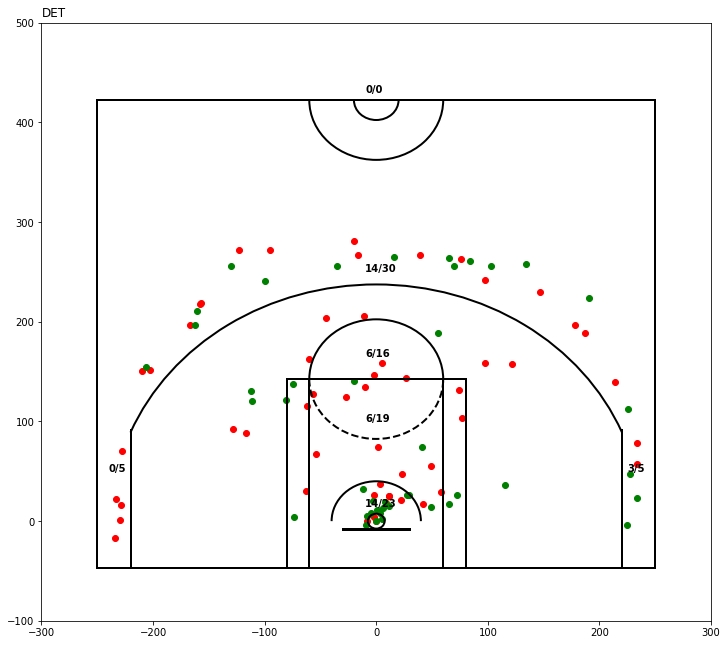

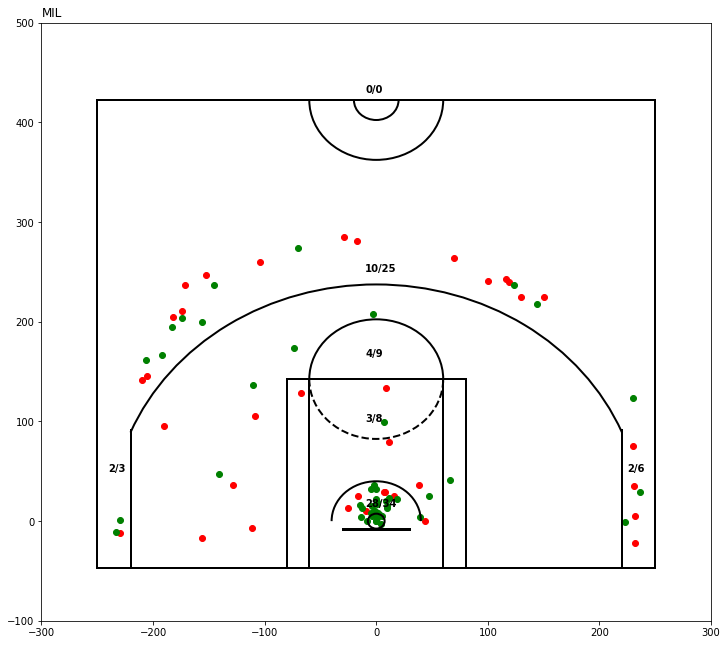

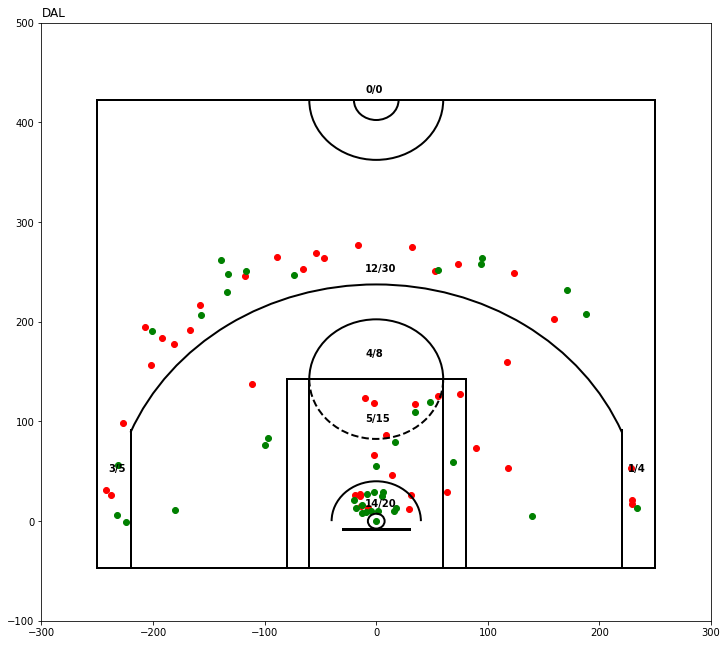

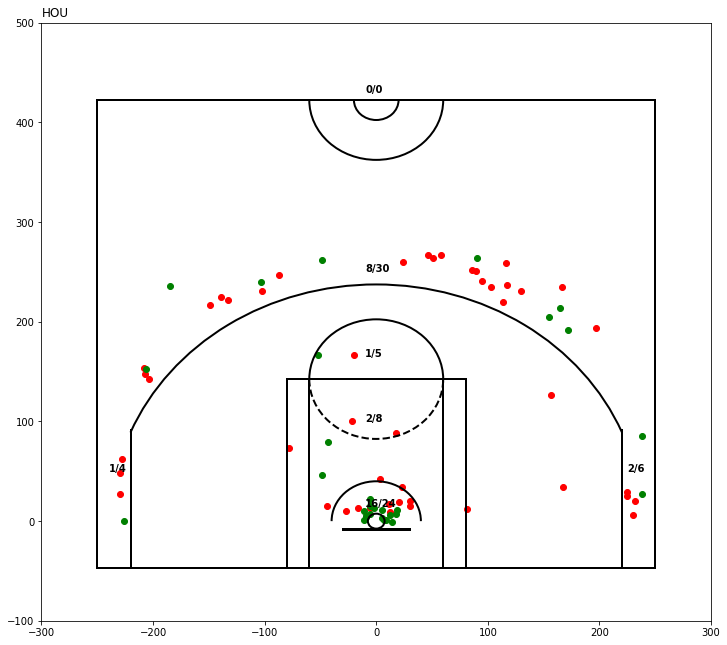

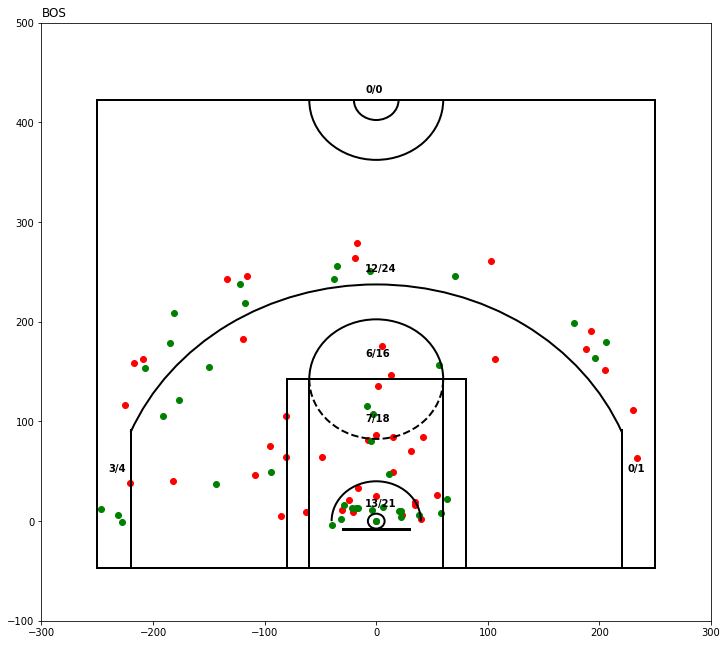

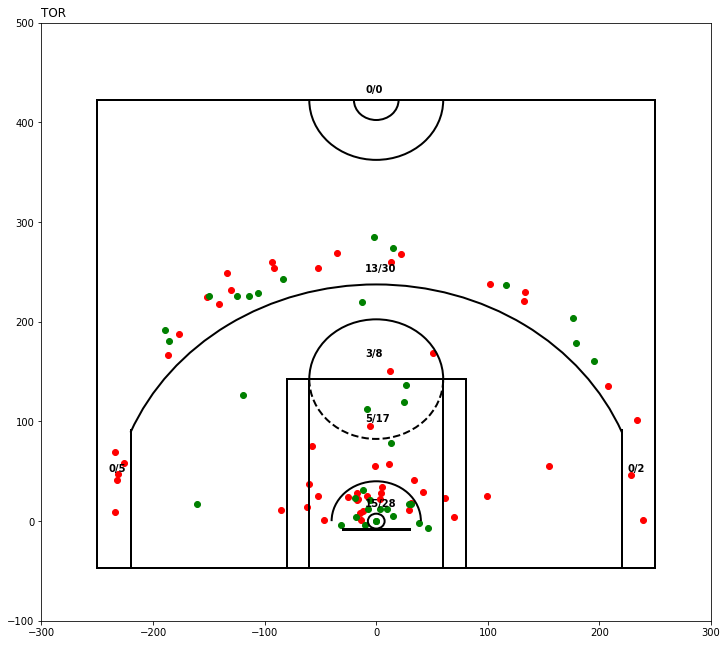

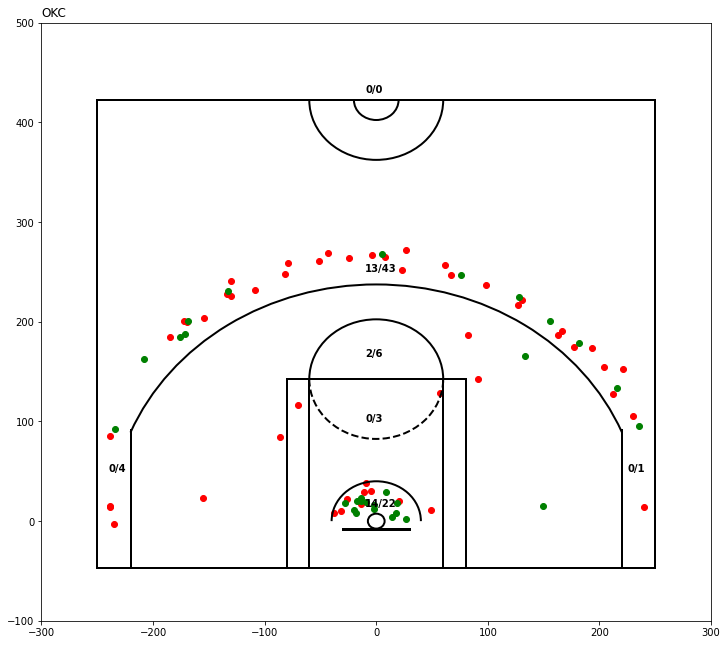

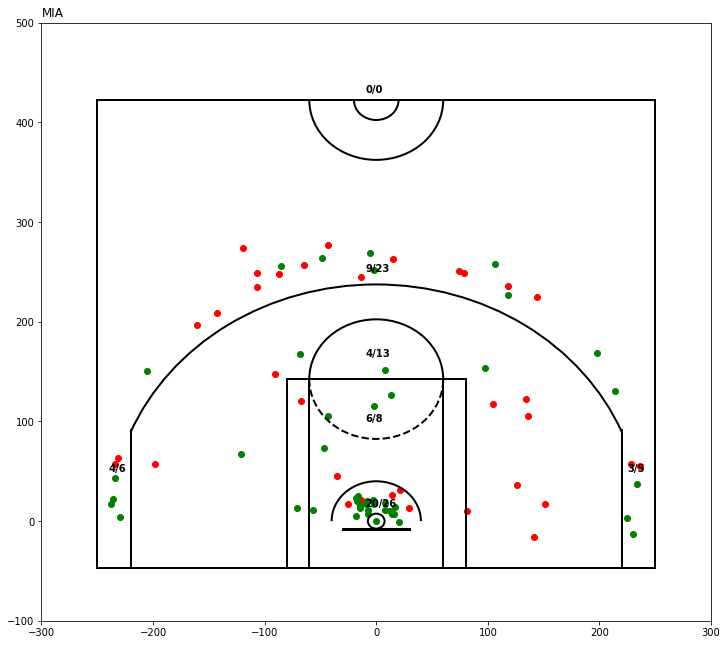

In [8]:
import requests
import json
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from nba_api.stats.endpoints import shotchartdetail
from matplotlib.patches import Circle, Rectangle, Arc
import boxscoreutils
import jinja2
import time

recent_games_df = boxscoreutils.get_games()
recent_game_ids = list(recent_games_df['GameId'])

games_dicts = []
for game_id in recent_game_ids:
    game = requests.get(f'https://api.pbpstats.com/get-game-stats?Type=Player&GameId={game_id}')
    game_data = game.json()
    away_team_id = game_data['away_team_id']
    home_team_id = game_data['home_team_id']

    away_df = pd.DataFrame(game_data['stats']['Away']['FullGame'])
    home_df = pd.DataFrame(game_data['stats']['Home']['FullGame'])

    # create shot charts
    time.sleep(45)
    away_shots_df = boxscoreutils.get_team_shot_data(away_df, away_team_id, game_id)
    home_shots_df = boxscoreutils.get_team_shot_data(home_df, home_team_id, game_id)

    boxscoreutils.plot_shot_chart(away_shots_df, game_data['away_team_abbreviation'],
                                  f"{game_data['away_team_abbreviation']}shots.png")
    boxscoreutils.plot_shot_chart(home_shots_df, game_data['home_team_abbreviation'],
                                  f"{game_data['home_team_abbreviation']}shots.png")

    # create plyaer box scores
    away_player_box_df = boxscoreutils.create_box_score(away_df, game_id)
    home_player_box_df = boxscoreutils.create_box_score(home_df, game_id)
    #print(away_player_box_df)
    #print(home_player_box_df)

    games_dicts.append({'home': game_data['home_team_abbreviation'],
                        'away': game_data['away_team_abbreviation'],
                        'awayTable': away_player_box_df.style.render(),
                        'homeTable': home_player_box_df.style.render(),
                        'awayshots': f"{game_data['away_team_abbreviation']}shots.png",
                        'homeshots': f"{game_data['home_team_abbreviation']}shots.png",
                        'awayscore': game_data['team_results']['Away']['FullGame']['Points'],
                        'homescore': game_data['team_results']['Home']['FullGame']['Points']
                        })
    # styler = df.style.applymap(color_negative_red)


# Template handling
env = jinja2.Environment(loader=jinja2.FileSystemLoader(searchpath=''))
template = env.get_template('template.html')
html = template.render(games=games_dicts)

# Write the HTML file
with open('report.html', 'w') as f:
    f.write(html)


In [6]:
columns_to_use = ['EntityId', 'Name', 'Minutes', 'Points', 'FG', 'rim', '3pt', 'FTs', 'TsPct', 'Usage', 'Rebounds',
                       'Ast (rim)', 'Turnovers', 'Steals', 'Blocks', 'O/DPoss', ]

final_columns = [col for col in columns_to_use if col in away_player_box_df.columns]
away_player_box_df.columns

Index(['Min', 'Pts', 'FG', 'Rim', '3pt', 'FTs', 'TS%', 'USG%', 'Reb',
       'Ast(rim)', 'TO', 'Stl', 'Blk', 'O/D Poss', '+/- '],
      dtype='object')

In [10]:
import requests
import json

url_base = 'https://stats.nba.com/stats/shotchartdetail'

headers = {
		'Host': 'stats.nba.com',
		'Connection': 'keep-alive',
		'Accept': 'application/json, text/plain, */*',
		'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
		'Referer': 'https://stats.nba.com/',
		"x-nba-stats-origin": "stats",
		"x-nba-stats-token": "true",
		'Accept-Encoding': 'gzip, deflate, br',
		'Accept-Language': 'en-US,en;q=0.9',
	}

parameters = {
	'ContextMeasure': 'FGA',
	'LastNGames': 0,
	'LeagueID': '00',
	'Month': 0,
	'OpponentTeamID': 0,
	'Period': 0,
	'PlayerID': 0,
	'SeasonType': 'Regular Season',
	'TeamID': 0,
	'VsDivision': '',
	'VsConference': '',
	'SeasonSegment': '',
	'Season': '2020-21',
	'RookieYear': '',
	'PlayerPosition': '',
	'Outcome': '',
	'Location': '',
	'GameSegment': '',
	'GameId': '0022000101',
	'DateTo': '',
	'DateFrom': ''
}


response = requests.get(url_base, params=parameters, headers=headers)
content = json.loads(response.content)

In [11]:
content

{'resource': 'shotchartdetail',
 'parameters': {'LeagueID': '00',
  'Season': '2020-21',
  'SeasonType': 'Regular Season',
  'TeamID': 0,
  'PlayerID': 0,
  'GameID': '0022000101',
  'Outcome': None,
  'Location': None,
  'Month': 0,
  'SeasonSegment': None,
  'DateFrom': None,
  'DateTo': None,
  'OpponentTeamID': 0,
  'VsConference': None,
  'VsDivision': None,
  'Position': None,
  'RookieYear': None,
  'GameSegment': None,
  'Period': 0,
  'LastNGames': 0,
  'ClutchTime': None,
  'AheadBehind': None,
  'PointDiff': None,
  'RangeType': None,
  'StartPeriod': None,
  'EndPeriod': None,
  'StartRange': None,
  'EndRange': None,
  'ContextFilter': '',
  'ContextMeasure': 'FGA'},
 'resultSets': [{'name': 'Shot_Chart_Detail',
   'headers': ['GRID_TYPE',
    'GAME_ID',
    'GAME_EVENT_ID',
    'PLAYER_ID',
    'PLAYER_NAME',
    'TEAM_ID',
    'TEAM_NAME',
    'PERIOD',
    'MINUTES_REMAINING',
    'SECONDS_REMAINING',
    'EVENT_TYPE',
    'ACTION_TYPE',
    'SHOT_TYPE',
    'SHOT_ZONE_

In [38]:
from nba_api.stats.endpoints import shotchartdetail
shot_json = shotchartdetail.ShotChartDetail(
                        team_id=1610612758,
                        player_id=0,
                        context_measure_simple='PTS_FB',
                        season_nullable='2020-21',
                        season_type_all_star='Regular Season',
                        game_id_nullable='0022000101')

In [39]:
shot_data = json.loads(shot_json.get_json())
shot_data

{'resource': 'shotchartdetail',
 'parameters': {'LeagueID': '00',
  'Season': '2020-21',
  'SeasonType': 'Regular Season',
  'TeamID': 1610612758,
  'PlayerID': 0,
  'GameID': '0022000101',
  'Outcome': None,
  'Location': None,
  'Month': 0,
  'SeasonSegment': None,
  'DateFrom': None,
  'DateTo': None,
  'OpponentTeamID': 0,
  'VsConference': None,
  'VsDivision': None,
  'Position': None,
  'RookieYear': None,
  'GameSegment': None,
  'Period': 0,
  'LastNGames': 0,
  'ClutchTime': None,
  'AheadBehind': None,
  'PointDiff': None,
  'RangeType': None,
  'StartPeriod': None,
  'EndPeriod': None,
  'StartRange': None,
  'EndRange': None,
  'ContextFilter': '',
  'ContextMeasure': 'PTS_FB'},
 'resultSets': [{'name': 'Shot_Chart_Detail',
   'headers': ['GRID_TYPE',
    'GAME_ID',
    'GAME_EVENT_ID',
    'PLAYER_ID',
    'PLAYER_NAME',
    'TEAM_ID',
    'TEAM_NAME',
    'PERIOD',
    'MINUTES_REMAINING',
    'SECONDS_REMAINING',
    'EVENT_TYPE',
    'ACTION_TYPE',
    'SHOT_TYPE',
   

In [40]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
relevant_data = shot_data['resultSets'][0]
headers = relevant_data['headers']
rows = relevant_data['rowSet']
df = pd.DataFrame(rows)
df.columns = headers

df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022000101,31,1626158,Richaun Holmes,1610612758,Sacramento Kings,1,9,34,Made Shot,Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,4,1,1,20210104,GSW,SAC
1,Shot Chart Detail,0022000101,71,1628368,De'Aaron Fox,1610612758,Sacramento Kings,1,6,53,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,3,16,1,1,20210104,GSW,SAC
2,Shot Chart Detail,0022000101,117,1628368,De'Aaron Fox,1610612758,Sacramento Kings,1,4,28,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,5,17,1,1,20210104,GSW,SAC
3,Shot Chart Detail,0022000101,348,203084,Harrison Barnes,1610612758,Sacramento Kings,2,1,43,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,5,6,1,1,20210104,GSW,SAC
4,Shot Chart Detail,0022000101,369,203084,Harrison Barnes,1610612758,Sacramento Kings,2,0,31,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-18,3,1,1,20210104,GSW,SAC
5,Shot Chart Detail,0022000101,419,1627741,Buddy Hield,1610612758,Sacramento Kings,3,8,18,Made Shot,Running Pull-Up Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,28,-168,230,1,1,20210104,GSW,SAC
6,Shot Chart Detail,0022000101,435,203084,Harrison Barnes,1610612758,Sacramento Kings,3,7,2,Made Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,28,-131,253,1,1,20210104,GSW,SAC
7,Shot Chart Detail,0022000101,697,1629002,Chimezie Metu,1610612758,Sacramento Kings,4,1,41,Made Shot,Running Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,0,25,1,1,20210104,GSW,SAC


In [2]:
from datetime import datetime

datetime.today().strftime('%m-%d-%Y')

'01-06-2021'

In [ ]:
from datetime import datetime

datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

In [5]:
import requests
import json
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from nba_api.stats.endpoints import shotchartdetail
from matplotlib.patches import Circle, Rectangle, Arc
import boxscoreutils
import jinja2
import time
recent_games_df = boxscoreutils.get_games()
game_date = list(recent_games_df['Date'])[0]
game_date = datetime.strptime(game_date, '%Y-%m-%d').strftime('%m-%d-%Y')
game_date

'01-05-2021'